In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle

from gpu import set_gpu
from matplotlib import pyplot as plt
import loop
import session
import plot_utils 
set_gpu()

plt.rcParams['figure.dpi'] = 300
%matplotlib qt

Using TensorFlow backend.


Num GPUs Available:  1


In [2]:
sub_type = 'TR'
with open('train_data_raw_'  + sub_type + '.p', 'rb') as f:
    raw, params,feat,feat_sq = pickle.load(f)

In [55]:
train_sess.feat_type = 'tdar'

noisefolder = train_sess.create_foldername(ftype='trainnoise')
noisefile = train_sess.create_filename(noisefolder, 1, 2, ftype='trainnoise')

if os.path.isfile(noisefile + '.p') and train_sess.train_load:
    print('loading data')
    with open(noisefile + '.p','rb') as f:
        scaler, x_train_noise_vae, x_train_clean_vae, x_valid_noise_vae, x_valid_clean_vae, y_train_clean, y_valid_clean, x_train_lda, y_train_lda, x_train_noise_lda, y_train_noise_lda = pickle.load(f)

loading data


In [22]:
# Loop through training
train_dict = {'sub_type':sub_type,'n_train':'fullallmix4', 'load':False, 'train_scale':5, 'epochs': 30, 'batch_size' : 128, 'sparsity':True,'dt':'manual','feat_type':'tdar','noise':True, 'latent_dim':4,'mod':['lda'],'gens':50, 'mod_dt':'emgscaleall','train_grp':2}
train_sess = session.Session(**train_dict)

# loop through subjects
for sub_i in range(1,np.max(params[:,0])+1):
    for lat in range(10,11):
        train_sess.latent_dim = lat
        train_out = train_sess.loop_cv(raw,params,sub=sub_i,mod='all')
        # for key,val in train_out.items():
        #     exec(key + '=val')


Running sub 1, model 2, latent dim 10, cv 1
loading data
Train on 25200 samples, validate on 6300 samples
Epoch 1/30
25200/25200 [==============================] - 3s 120us/sample - loss: 1.9705 - accuracy: 0.1856 - val_loss: 1.8769 - val_accuracy: 0.2122
Epoch 2/30
25200/25200 [==============================] - 2s 72us/sample - loss: 1.6750 - accuracy: 0.3330 - val_loss: 1.5430 - val_accuracy: 0.4065
Epoch 3/30
25200/25200 [==============================] - 2s 72us/sample - loss: 1.3903 - accuracy: 0.4483 - val_loss: 1.3400 - val_accuracy: 0.4940
Epoch 4/30
25200/25200 [==============================] - 2s 76us/sample - loss: 1.2494 - accuracy: 0.4894 - val_loss: 1.3072 - val_accuracy: 0.5041
Epoch 5/30
25200/25200 [==============================] - 2s 72us/sample - loss: 1.1695 - accuracy: 0.5179 - val_loss: 1.2529 - val_accuracy: 0.5427
Epoch 6/30
25200/25200 [==============================] - 2s 73us/sample - loss: 1.1080 - accuracy: 0.5410 - val_loss: 1.2105 - val_accuracy: 0.5640

In [7]:
train_dict = {'sub_type':sub_type,'n_train':'fullallmix4', 'load':False, 'train_scale':5, 'epochs': 30, 'batch_size' : 128, 'sparsity':True,'dt':'cv','feat_type':'feat','noise':True, 'latent_dim':4,'mod':['lda'],'gens':50, 'mod_dt':'1028','train_grp':2}
train_sess = session.Session(**train_dict)
svae, cnn,vcnn,ecnn = plot_utils.plot_latent_dim(params,train_sess)

c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:25: RuntimeWarning: Mean of empty slice
  # mean_acc = np.nanmean(np.nanmean(all_acc,axis=2),axis=0)
c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:26: RuntimeWarning: Mean of empty slice
  # mean_val = np.nanmean(np.nanmean(all_val,axis=2),axis=0)


In [ ]:
# reduce dimensions of inputs
sub = 2
test_dict = {'sub_type':sub_type,'dt':'manual', 'mod_dt':'1012','sparsity':True, 'load':True, 'batch_size':128, 'latent_dim':5, 'epochs':30,'train_scale':5, 'n_train':'fullgaussflat4', 'n_test':'partgauss4','feat_type':'feat', 'noise':True,'train_grp':2,'test_dt': 'noisescale'}
test_sess = session.Session(**test_dict)
ntype = 'gauss'
addon = True

if not addon:
    x_clean_lda = np.array([]).reshape(0,6)
    x_clean_noise = np.array([]).reshape(0,6)
    x_clean_sae = np.array([]).reshape(0,5)
    x_clean_cnn = np.array([]).reshape(0,5)
    x_clean_vcnn = np.array([]).reshape(0,5)
    y_clean = np.array([]).reshape(0,1)

    x_noisy_lda = np.array([]).reshape(0,6)
    x_noisy_noise = np.array([]).reshape(0,6)
    x_noisy_sae = np.array([]).reshape(0,5)
    x_noisy_cnn = np.array([]).reshape(0,5)
    x_noisy_vcnn = np.array([]).reshape(0,5)
    y_noisy = np.array([]).reshape(0,1)

if ntype == 'flat':
    test_max = 2
else:
    test_max = 6

for i in range(1,5):
    test_sess.n_test = 'part' + ntype + str(i)
    for test_scale in range(1,test_max):
        red_out = test_sess.reduce_latent(raw, params, sub, cv=1,test_scale=1)
        for key,val in red_out.items():
            exec(key + '=val')
        x_clean_lda = np.vstack([x_test_lda_red[:clean_size,:], x_clean_lda])
        x_clean_noise = np.vstack([x_test_noise_red[:clean_size,:], x_clean_noise])
        x_clean_sae = np.vstack([x_test_sae_red[:clean_size,:], x_clean_sae])
        x_clean_cnn = np.vstack([x_test_cnn_red[:clean_size,:], x_clean_cnn])
        x_clean_vcnn = np.vstack([x_test_vcnn_red[:clean_size,:], x_clean_vcnn])
        y_clean = np.vstack([y_test[:clean_size,:], y_clean])

        x_noisy_lda = np.vstack([x_test_lda_red[clean_size:,:], x_noisy_lda])
        x_noisy_noise = np.vstack([x_test_noise_red[clean_size:,:], x_noisy_noise])
        x_noisy_sae = np.vstack([x_test_sae_red[clean_size:,:], x_noisy_sae])
        x_noisy_cnn = np.vstack([x_test_cnn_red[clean_size:,:], x_noisy_cnn])
        x_noisy_vcnn = np.vstack([x_test_vcnn_red[clean_size:,:], x_noisy_vcnn])
        y_noisy = np.vstack([y_test[clean_size:,:], y_noisy])


In [27]:
# Plot reduced dimensions
plot_utils.plot_latent_rep(x_clean_lda, y_clean)
plot_utils.plot_latent_rep(x_clean_noise, y_clean)
plot_utils.plot_latent_rep(x_clean_sae, y_clean)
plot_utils.plot_latent_rep(x_clean_cnn, y_clean)
plot_utils.plot_latent_rep(x_clean_vcnn, y_clean)

In [28]:
plot_utils.plot_latent_rep(x_noisy_lda, y_noisy)
plot_utils.plot_latent_rep(x_noisy_noise, y_noisy)
plot_utils.plot_latent_rep(x_noisy_sae, y_noisy)
plot_utils.plot_latent_rep(x_noisy_cnn, y_noisy)
plot_utils.plot_latent_rep(x_noisy_vcnn, y_noisy)

In [33]:
x_all_lda = np.vstack([x_clean_lda,x_noisy_lda])
x_all_noise = np.vstack([x_clean_noise,x_noisy_noise])
x_all_sae = np.vstack([x_clean_sae,x_noisy_sae])
x_all_cnn = np.vstack([x_clean_cnn,x_noisy_cnn])
x_all_vcnn = np.vstack([x_clean_vcnn,x_noisy_vcnn])
y_all = np.vstack([y_clean, y_noisy])
plot_utils.plot_latent_rep(x_all_lda, y_all)
plot_utils.plot_latent_rep(x_all_noise, y_all)
plot_utils.plot_latent_rep(x_all_sae, y_all)
plot_utils.plot_latent_rep(x_all_cnn, y_all)
plot_utils.plot_latent_rep(x_all_vcnn, y_all)

In [5]:
import os
import copy as cp
test_dict = {'sub_type':sub_type,'dt':'manual', 'mod_dt':'emgscaleall','sparsity':True, 'load':True, 'batch_size':128, 'latent_dim':10, 'epochs':30,'train_scale':5, 'n_train':'fullallmix4', 'n_test':'partgauss4','feat_type':'tdar', 'noise':True,'train_grp':2,'test_dt':'noisescaleall'}
test_sess = session.Session(**test_dict) 

load = True
for posi in range(1,2):#5):
    ntype = 'posrealmove'# + str(posi)

    if ntype[:3] == 'pos' and not load:
        i_start = 4
        i_end = 5
        acc_all = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
        acc_clean = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
        acc_noise = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
    elif ntype == 'flat' or 'mix' in ntype or 'real' in ntype:
        i_start = 1
        i_end = 5
        acc_all = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
        acc_clean = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
        acc_noise = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
    else:
        i_start = 1
        i_end = 5
        acc_all = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)
        acc_clean = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)
        acc_noise = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)

    for i in range(i_start,i_end):
        if load and 'pos' in ntype:
            test_sess.n_test = 'part' + ntype + str(i) + '4'
        else:
            test_sess.n_test = 'part' + ntype + str(i)    

        if load:
            for sub in range(1,np.max(params[:,0])):
                foldername = test_sess.create_foldername(ftype='results')
                filename = test_sess.create_filename(foldername, 1, sub)
                print(filename)
                if os.path.isfile(filename + '_' + test_sess.n_test + '_subresults.p'):
                    with open(filename + '_' + test_sess.n_test + '_subresults.p', 'rb') as f:
                        temp_all, temp_noise, temp_clean = pickle.load(f)
                    acc_all[sub-1,i-i_start,:,:], acc_clean[sub-1,i-i_start,:,:], acc_noise[sub-1,i-i_start,:,:] = np.squeeze(temp_all),np.squeeze(temp_clean),np.squeeze(temp_noise)
        else:
            test_out = test_sess.loop_test(raw, params)
            for key,val in test_out.items():
                exec(key + '=val')

    ave_pos_noise= np.nanmean(acc_noise,axis=0)
    ave_pos_clean = np.nanmean(acc_clean,axis=0)
    ave_noise= np.nanmean(acc_noise,axis=2)
    ave_clean = np.nanmean(acc_clean,axis=2)
    ave_gauss_noise = np.nanmean(ave_noise,axis=0)
    ave_gauss_clean = np.nanmean(ave_clean,axis=0)

    if 'gauss' in ntype:
        ave_gauss= cp.deepcopy(ave_noise)
    elif 'flat' in ntype:
        ave_flat = cp.deepcopy(ave_noise)
    elif '60hz' in ntype:
        ave_60hz = cp.deepcopy(ave_noise)
    elif 'mix' in ntype:
        ave_mix = cp.deepcopy(ave_noise)

out_dict['ave_' + ntype] = cp.deepcopy(ave_noise)

Loading training data: traindata_manual/TR1_traindata_2.p
Running sub 1, model 2, latent dim 10
Loading training data: traindata_manual/TR1_traindata_4.p
loading data
[0.51642857 0.4575     0.5275     0.55142857 0.52928571 0.14285714
 0.14285714 0.53642857 0.56214286 0.14285714 0.2825     0.47
 0.18642857 0.46035714 0.59191702]
[0.5125     0.51071429 0.60535714 0.62857143 0.6075     0.14285714
 0.14285714 0.6025     0.64714286 0.14285714 0.61428571 0.48892857
 0.57464286 0.48928571 0.        ]
saving sub results: results_2_manual_noisescaleall/TR1_tdar_dim_10_ep_30_bat_128_fullallmix4_5_lr_10_sparse_partposrealmove14_subresults.p
Loading training data: traindata_manual/TR2_traindata_2.p
Running sub 2, model 2, latent dim 10
Loading training data: traindata_manual/TR2_traindata_4.p
scaling noise
[0.62       0.67392857 0.77607143 0.76428571 0.77714286 0.14285714
 0.14285714 0.78142857 0.76928571 0.14285714 0.56678571 0.68857143
 0.24892857 0.68035714 0.80829757]
[0.68964286 0.75785714 0.

C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice


Loading training data: traindata_manual/TR1_traindata_4.p
scaling noise
[0.48821429 0.41035714 0.48035714 0.48178571 0.46107143 0.14285714
 0.14285714 0.48357143 0.51285714 0.14285714 0.20678571 0.4425
 0.14285714 0.40285714 0.5609319 ]
[0.5125     0.51071429 0.60535714 0.63214286 0.6075     0.14285714
 0.14285714 0.6025     0.64642857 0.14285714 0.61428571 0.48892857
 0.57464286 0.48928571 0.        ]
saving sub results: results_2_manual_noisescaleall/TR1_tdar_dim_10_ep_30_bat_128_fullallmix4_5_lr_10_sparse_partposrealmove24_subresults.p
Loading training data: traindata_manual/TR2_traindata_2.p
Running sub 2, model 2, latent dim 10
Loading training data: traindata_manual/TR2_traindata_4.p
scaling noise
[0.52214286 0.58357143 0.68035714 0.69321429 0.69571429 0.14285714
 0.14285714 0.68964286 0.705      0.14285714 0.42357143 0.58214286
 0.19107143 0.55107143 0.7688172 ]
[0.68964286 0.75785714 0.87214286 0.835      0.83357143 0.14285714
 0.14285714 0.86535714 0.8375     0.14285714 0.8325

C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice


Loading training data: traindata_manual/TR1_traindata_4.p
scaling noise
[0.39821429 0.36785714 0.40178571 0.41142857 0.375      0.14285714
 0.14285714 0.395      0.42857143 0.14285714 0.18       0.37535714
 0.1575     0.34285714 0.52642857]
[0.5125     0.51071429 0.60535714 0.63       0.6075     0.14285714
 0.14285714 0.6025     0.64642857 0.14285714 0.61428571 0.48892857
 0.57464286 0.48928571 0.        ]
saving sub results: results_2_manual_noisescaleall/TR1_tdar_dim_10_ep_30_bat_128_fullallmix4_5_lr_10_sparse_partposrealmove34_subresults.p
Loading training data: traindata_manual/TR2_traindata_2.p
Running sub 2, model 2, latent dim 10
Loading training data: traindata_manual/TR2_traindata_4.p
scaling noise
[0.45678571 0.48785714 0.58607143 0.60464286 0.61035714 0.14285714
 0.14285714 0.58178571 0.61178571 0.14285714 0.35714286 0.48321429
 0.16071429 0.46357143 0.73571429]
[0.68964286 0.75785714 0.87214286 0.83392857 0.83357143 0.14285714
 0.14285714 0.86535714 0.84464286 0.14285714 0.

C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice


Loading training data: traindata_manual/TR1_traindata_4.p
scaling noise
[0.32964286 0.3125     0.2825     0.32714286 0.28857143 0.14285714
 0.14285714 0.29035714 0.33214286 0.14285714 0.16357143 0.2825
 0.14142857 0.28714286 0.47849462]
[0.5125     0.51071429 0.60535714 0.62785714 0.6075     0.14285714
 0.14285714 0.6025     0.65       0.14285714 0.61428571 0.48892857
 0.57464286 0.48928571 0.        ]
saving sub results: results_2_manual_noisescaleall/TR1_tdar_dim_10_ep_30_bat_128_fullallmix4_5_lr_10_sparse_partposrealmove44_subresults.p
Loading training data: traindata_manual/TR2_traindata_2.p
Running sub 2, model 2, latent dim 10
Loading training data: traindata_manual/TR2_traindata_4.p
scaling noise
[0.3925     0.36071429 0.47892857 0.49464286 0.50642857 0.14285714
 0.14285714 0.47357143 0.5125     0.14285714 0.31178571 0.37178571
 0.17357143 0.38785714 0.65842294]
[0.68964286 0.75785714 0.87214286 0.83428571 0.83357143 0.14285714
 0.14285714 0.86535714 0.83535714 0.14285714 0.8325

In [4]:
out_dict = {}
# ave_gauss = out_dict['ave_posrealbreak']
# ave_mix = out_dict['ave_posrealmix']
# ave_flat = out_dict['ave_posrealmove']

In [ ]:
plot_utils.plot_summary(ave_clean,ave_gauss,ave_mix,ave_flat)

In [21]:
# plot accuracy vs # noisy electrodes
plot_utils.plot_electrode_results(ave_gauss_noise,ave_gauss_clean,test_sess.n_train,ntype,test_sess.sub_type)

In [23]:
# plot accuracy vs. position
plot_utils.plot_pos_results(ave_pos_noise)

In [159]:
with open('real_noise/all_real_noise.p', 'rb') as f:
    real_noise_temp, _ = pickle.load(f)

In [207]:
# test = np.ndarray.flatten(real_noise_temp[0,:,:])
out = np.squeeze(np.zeros((200*1000//8,5)))
t = np.linspace(0,200//8,200*1000//8)
fig, ax = plt.subplots(5,1)
for ch in range(5):
    it = 0
    for i in range(0,1000,8):
        out[it*200:it*200+200,ch] = real_noise_temp[ch,i,:]
        it += 1
    ax[ch].plot(t,out[:,ch])
    ax[ch].set_ylim([-5,5])
    ax[ch].set_xlim([0,200//8])
    if ch < 4:
        ax[ch].set_xticks([])
    # ax[ch].tight_layout()

In [214]:
import process_data as prd
foldername = test_sess.create_foldername()
filename = test_sess.create_filename(foldername, 1, 1)
test_sess.n_test = 'partrealbreaknm3'

with open(filename + '.p', 'rb') as f:
    scaler, svae_w, svae_enc_w, svae_dec_w, svae_clf_w, sae_w, sae_enc_w, sae_clf_w, cnn_w, cnn_enc_w, cnn_clf_w, vcnn_w, vcnn_enc_w, vcnn_clf_w, ecnn_w, ecnn_enc_w, ecnn_clf_w, w_svae, c_svae, w_sae, c_sae, w_cnn, c_cnn, w_vcnn, c_vcnn, w_ecnn, c_ecnn, w, c, w_noise, c_noise, mu, C, qda, qda_noise,emg_scale = pickle.load(f)   

_, x_test, _, _, p_test, _ = prd.train_data_split(raw,params,4,test_sess.sub_type,dt=test_sess.dt,train_grp=4)
x_test = x_test * emg_scale
x_test_noise, x_test_clean, y_test_clean = prd.add_noise(x_test, p_test, 4, test_sess.n_test, 1, real_noise=real_noise_temp, emg_scale = emg_scale)
x_test_noise[x_test_noise > 5] = 5
x_test_noise[x_test_noise < -5] = -5

Loading training data: traindata_manual/TR4_traindata_4.p


In [215]:
fig, ax = plt.subplots(6,1)
fig2, ax2 = plt.subplots(6,1)
ind = np.random.randint(np.size(x_test,0),np.size(x_test_noise,0))
print(ind)
for ch in range(6):
    ax[ch].plot(x_test_clean[ind,ch,:])
    ax2[ch].plot(x_test_noise[ind,ch,:])
    ax[ch].set_ylim([-5,5])
    ax2[ch].set_ylim([-5,5])
    ax[0].set_title(str(np.argmax(y_test_clean[ind,:])))

2821


## OLD

In [15]:
## Plot training metrics trajectories
# initialize parameters
train_grp = 2
dt = 'cv'
feat_type = 'feat'
latent_dim = 5
epochs = 30
n_train = 'fullgaussflat4'
train_scale = 5
foldername = 'models' + '_' + str(train_grp) + '_' + dt
batch_size = 128
n_test = 0
lr = 0.001

# initialize loss and accuracy matrices
loss = np.full([4,4,epochs],np.nan)
val_loss = np.full([4,4,epochs],np.nan)
acc = np.full([4,4,epochs],np.nan)
val_acc = np.full([4,4,epochs],np.nan)

# loop through subjects
for sub in range(1,2):#6):
    # loop through cross validations
    for cv in range(1,5):
        # load data
        filename = foldername + '/' + sub_type + str(sub) + '_' + feat_type + '_dim_' + str(latent_dim) + '_ep_' + str(epochs) + '_bat_' + str(batch_size) + '_' + n_train + '_' + str(train_scale) + '_lr_' + str(int(lr*10000)) 
        filename += '_cv_'+ str(cv) + '_sparse'
        with open(filename + '_hist.p', 'rb') as f:
            svae_hist, sae_hist, cnn_hist, vcnn_hist = pickle.load(f)

        svae_hist = np.transpose(svae_hist)

        # compile losses and accuracies (uncomment back if all models have same # epochs)
        loss[cv-1,:2,:] = np.array([svae_hist[2,:], sae_hist['loss']])#, cnn_hist['loss'], vcnn_hist['loss']])
        val_loss[cv-1,:2,:] = np.array([svae_hist[9,:], sae_hist['val_loss']])#, cnn_hist['val_loss'], vcnn_hist['val_loss']])
        acc[cv-1,:2,:] = np.array([svae_hist[5,:], sae_hist['accuracy']])#, cnn_hist['accuracy'], vcnn_hist['accuracy']])
        val_acc[cv-1,:2,:] = np.array([svae_hist[-2,:], sae_hist['val_accuracy']])#, cnn_hist['val_accuracy'], vcnn_hist['val_accuracy']])

        # 0-30 for 30 epochs
        loss[cv-1,2:,0:30] = np.array([cnn_hist['loss'], vcnn_hist['loss']])
        val_loss[cv-1,2:,0:30] = np.array([cnn_hist['val_loss'], vcnn_hist['val_loss']])
        acc[cv-1,2:,0:30] = np.array([cnn_hist['accuracy'], vcnn_hist['clf_accuracy']])
        val_acc[cv-1,2:,0:30] = np.array([cnn_hist['val_accuracy'], vcnn_hist['val_clf_accuracy']])

    # load results
    resultsfile = filename
    # with open(resultsfile + '_results.p', 'rb') as f:
    #     acc_all, acc_clean, acc_noise = pickle.load(f)

    # average metrics over cvs
    ave_loss = np.mean(loss,axis=0)
    ave_val_loss = np.mean(val_loss,axis=0)
    ave_acc = np.mean(acc,axis=0)
    ave_val_acc = np.mean(val_acc,axis=0)

    # plot metrics over epochs
    plt.figure(sub)
    for i in range(0,4):
        ax = plt.subplot(2,2,i+1)
        ax.plot(ave_loss[i])
        ax.plot(ave_val_loss[i])
        # ax.set_ylim(0,5)
    plt.figure(sub+1)
    for i in range(0,4):
        ax2 = plt.subplot(2,2,i+1)
        ax2.plot(ave_acc[i])
        ax2.plot(ave_val_acc[i])
        ax2.set_ylim(0,1)

FileNotFoundError: [Errno 2] No such file or directory: 'models_2_cv/TR1_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_cv_1_sparse_hist.p'

In [ ]:
# Plot generated or reconstructed features
col = ['k','b','r','g','c','y','m']
fig = plt.figure()

# number of channels
ch_max = x_noise.shape[1]

# number of classes
cl_max = y_train.shape[1]

# loop through channels
for i in range(0,ch_max-1):
    ax = plt.subplot(6,1,i+1)

    # loop through classes
    for cl in range(2,3):
        # index inputs from current class
        x_noise_cl = x_noise[y_train[:,cl]==1,i,:]
        x_clean_cl = x_clean[y_train[:,cl]==1,i,:]
        dec_ind = gen_clf == cl

        ## plot all noisy features
        # for x_all in range(0,x_noise_cl.shape[0]):
        #     ax.plot(x_noise_cl[x_all,:,0],col[cl],linewidth=1)

        ## plot all clean features
        for x_all in range(0,x_clean_cl.shape[0]):
            ax.plot(x_clean_cl[x_all,:,0],col[cl],linewidth=.5,linestyle='-')

        ## plot all decoder output
        max_gen = 100
        ax.plot(np.transpose(dec_out[dec_ind,i,:,0][:max_gen,:]),col[cl+1],linewidth=.5,linestyle='--')
        
        ## plot mean of noisy features
        # ax.plot(np.mean(x_cl[:x_cl.shape[0],:,0],axis=0),col[cl],linewidth=1)

        ## plot mean of clean features
        # ax.plot(np.mean(x_clean_cl[:x_clean_cl.shape[0],:,0],axis=0),col[cl],linewidth=1,linestyle=':')

        ## plot mean of reconstructed output
        # rec_cl = dec_out[y_train[:,cl]==1,i,:]
        # ax.plot(np.mean(rec_cl[:,:,0],axis=0),col[cl],linewidth=1,linestyle='--')
        
        ## plot mean of decoder output
        # ax.plot(np.mean(np.transpose(dec_out[dec_ind,i,:,0]),axis=1),col[cl+1],linewidth=.5,linestyle='--')

    ax.set_ylim([0,1])

In [7]:
# Load noise results
sub_all, sub_noise, sub_clean, ave_all, ave_noise, ave_clean = loop.ave_results(params, sub_type, train_grp=2, feat_type='feat',epochs=30,n_train='fullgaussflat4',train_scale=5,n_test='partgauss2', latent_dim=4,loop_i='noise', dt='cv')
sub_all, sub_noise, sub_clean, flat_ave_all, flat_ave_noise, flat_ave_clean = loop.ave_results(params, sub_type, train_grp=2, feat_type='feat',epochs=30,n_train='fullgaussflat4',train_scale=5,n_test='partflat2', latent_dim=4,loop_i='noise',dt='cv')

NameError: name 'flat_ave_noise' is not defined

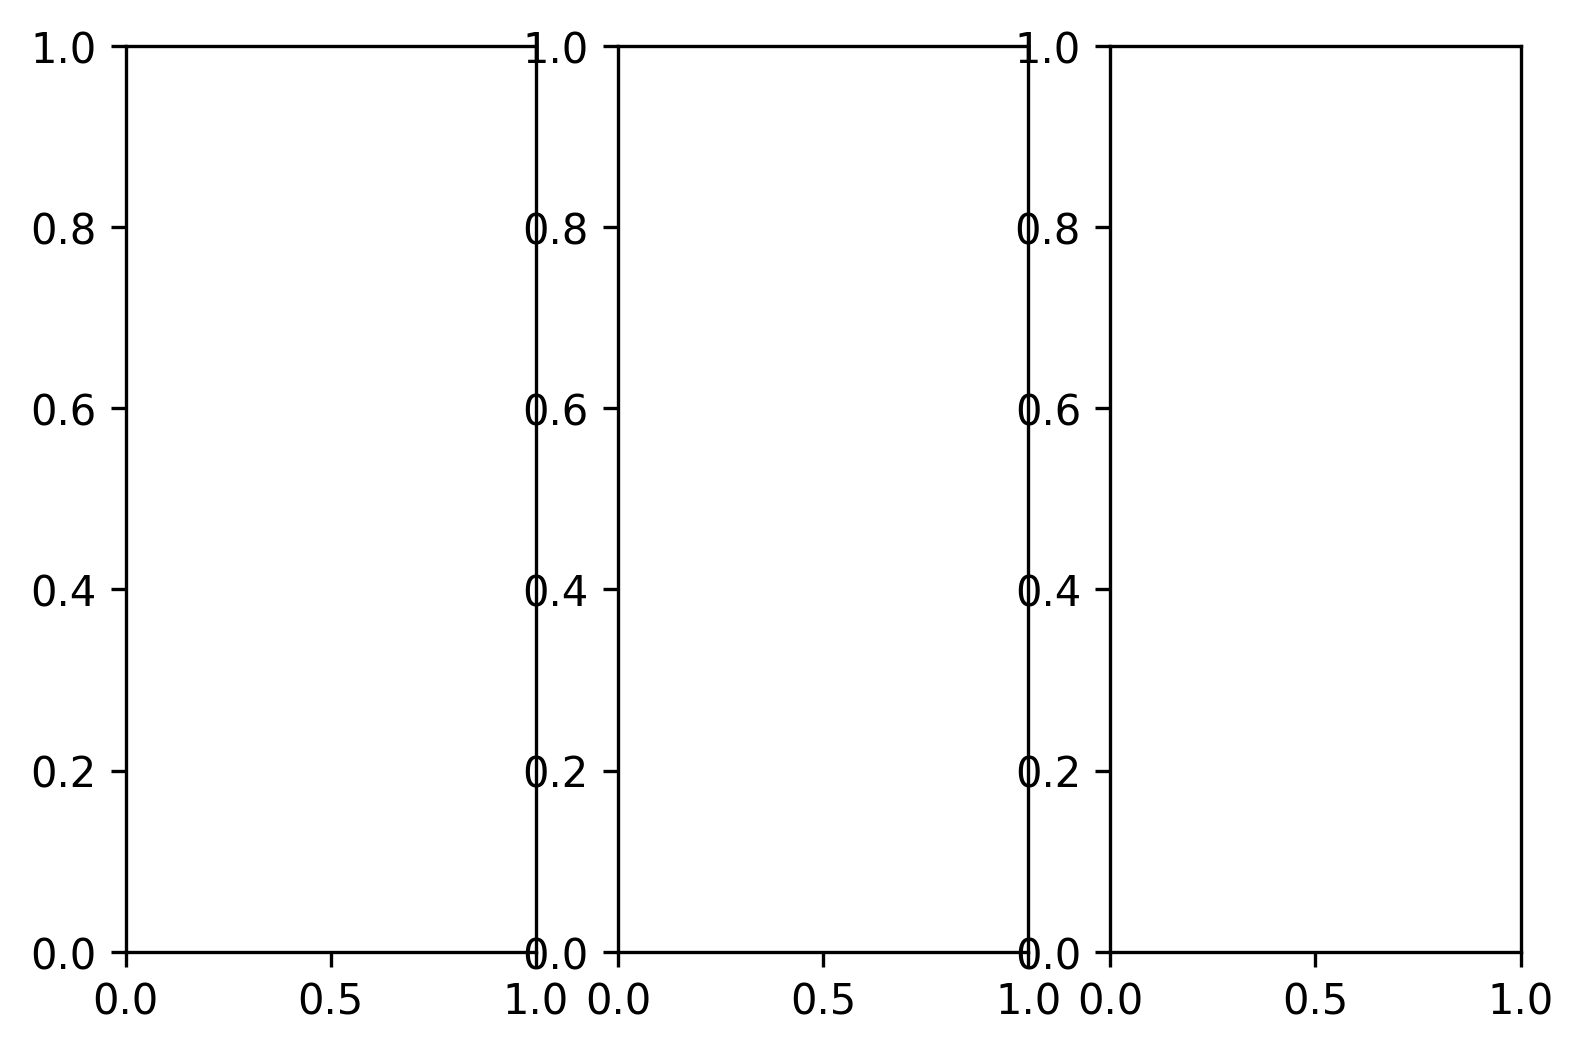

In [7]:
# Plot accuracy vs. noise
fig,ax = plt.subplots(1,3)
for i in range(0,4):
    ax[0].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'-o')
for i in range(4,9):    
    ax[1].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'-o')
for i in range(9,14):    
    ax[2].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'--o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0, 'Type of Noise', ha='center')
ax[0].legend(['svcnn','sae','cnn','vcnn'])
ax[1].legend(['svcnn-lda','sae-lda','cnn-lda','vcnn-lda','rec-lda'])
ax[2].legend(['LDA','LDA-corrupt','QDA','QDA-corrupt','ch'])
ax[1].set_yticks([])
ax[2].set_yticks([])
for i in range(0,3):
    ax[i].set_ylim(0,1)
    ax[i].set_xticks(range(0,6))
    ax[i].set_xticklabels(['Flat','1','2','3','4','5'])

fig.set_tight_layout(True)

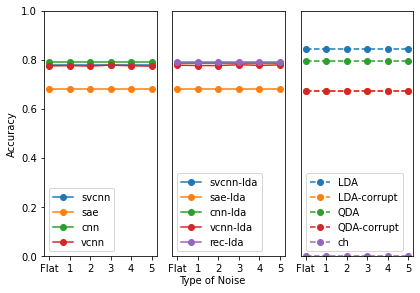

In [10]:
# Plot accuracy vs. noise
fig,ax = plt.subplots(1,3)
for i in range(0,4):
    ax[0].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'-o')
for i in range(4,9):    
    ax[1].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'-o')
for i in range(9,14):    
    ax[2].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'--o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0, 'Type of Noise', ha='center')
ax[0].legend(['svcnn','sae','cnn','vcnn'])
ax[1].legend(['svcnn-lda','sae-lda','cnn-lda','vcnn-lda','rec-lda'])
ax[2].legend(['LDA','LDA-corrupt','QDA','QDA-corrupt','ch'])
ax[1].set_yticks([])
ax[2].set_yticks([])
for i in range(0,3):
    ax[i].set_ylim(0,1)
    ax[i].set_xticks(range(0,6))
    ax[i].set_xticklabels(['Flat','1','2','3','4','5'])

fig.set_tight_layout(True)

In [3]:
# Loop through noise
acc_all, acc_noise, acc_clean, file_name = loop.loop_noise(raw, params, sub_type, load=False, n_train='fullgaussflat4', train_scale=5, n_test=0,epochs=30, batch_size = 128, sparsity=True,dt='cv',feat_type='feat',noise=True, latent_dim=4)

10 - clf_loss: 0.7969 - decoder_accuracy: 0.0039 - clf_accuracy: 0.6803 - val_loss: 1.0422 - val_decoder_loss: 0.0800 - val_clf_loss: 0.9572 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6190
Epoch 11/30
18900/18900 [==============================] - 2s 126us/sample - loss: 0.8524 - decoder_loss: 0.0848 - clf_loss: 0.7650 - decoder_accuracy: 0.0039 - clf_accuracy: 0.6941 - val_loss: 1.0159 - val_decoder_loss: 0.0789 - val_clf_loss: 0.9367 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6186
Epoch 12/30
18900/18900 [==============================] - 2s 115us/sample - loss: 0.8229 - decoder_loss: 0.0882 - clf_loss: 0.7323 - decoder_accuracy: 0.0039 - clf_accuracy: 0.7081 - val_loss: 0.9926 - val_decoder_loss: 0.0857 - val_clf_loss: 0.9000 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6271
Epoch 13/30
18900/18900 [==============================] - 2s 114us/sample - loss: 0.8014 - decoder_loss: 0.0913 - clf_loss: 0.7074 - decoder_accuracy: 0.0039 - clf_accuracy: 0.7258 -

## Latent Dimension Loop

In [ ]:
# loop through latent dimensions
sub_all, sub_noise, sub_clean, file_name = loop.loop_alldim(raw, params, sub_type, load=False, n_train='gaussflat', train_scale=3, n_test='gauss', test_scale=1,epochs=30, sparsity=True, dt='0414')

In [ ]:
# load results from latent dimension loop, sparse vs. not sparse
sub_all, sub_noise, sub_clean, sparse_all, sparse_noise, sparse_clean = loop.load_results(params, sub_type=sub_type,sparsity=True, dt='0414')
sub_all, sub_noise, sub_clean, ave_all, ave_noise, ave_clean = loop.load_results(params, sub_type=sub_type,sparsity=False, dt='0414')

In [ ]:
# Plot accuracy vs. latent dimension
fig,ax = plt.subplots(1,2)
for i in range(0,4):
    ax[0].plot(ave_noise[:,i],'-o')
    ax[1].plot(sparse_noise[:,i],'-o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0.04, 'Latent Dimension', ha='center')
ax[0].set_ylim(0.5,1)
ax[1].set_ylim(0.5,1)
ax[0].legend(['svcnn','sae','cnn','vcnn'])